<a href="https://colab.research.google.com/github/2yeeji/IMEN415/blob/main/%5B%EB%8B%A4%EB%B3%80%EB%9F%89%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%5D%5B%EA%B3%BC%EC%A0%9C5%5D%5B2021150456%5D%5B%EC%9D%B4%EC%98%88%EC%A7%80%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/다변량분석/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/다변량분석


# Part 1

In [ ]:
# A-Priori 알고리즘 구현
!pip install mlxtend

# 트랜잭션 데이터들의 아이템 시각화에 사용
!pip install wordcloud
!pip install networkx
!pip install plotly

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from collections import Counter
from wordcloud import WordCloud
import networkx as nx
import plotly.express as px

## Q1

In [ ]:
import pandas as pd

df = pd.read_csv('big_student_clear_third_version.csv')

df['Item_Name'] = df['institute'] + '_' + df['course_id'] + '_' + df['final_cc_cname_DI'] + '_' + df['LoE_DI']

df_association = df[['userid_DI', 'Item_Name']]

df_association.rename(columns={'userid_DI': 'Transaction ID'}, inplace=True)

df_association.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-3-3e41589c4f1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_association.rename(columns={'userid_DI': 'Transaction ID'}, inplace=True)


,Transaction ID,Item_Name
0,MHxPC130313697,HarvardX_PH207x_India_Bachelor's
1,MHxPC130237753,HarvardX_PH207x_United States_Secondary
2,MHxPC130202970,HarvardX_CS50x_United States_Bachelor's
3,MHxPC130223941,HarvardX_CS50x_Other Middle East/Central Asia_...
4,MHxPC130317399,HarvardX_PH207x_Australia_Master's
5,MHxPC130191782,HarvardX_CS50x_Pakistan_Bachelor's
6,MHxPC130191782,HarvardX_ER22x_Pakistan_Bachelor's
7,MHxPC130267000,HarvardX_PH207x_Other South Asia_Master's
8,MHxPC130435800,HarvardX_CS50x_India_Bachelor's
9,MHxPC130284813,HarvardX_PH207x_United States_Bachelor's


In [ ]:
df_association.to_csv('association_dataset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Q2

In [ ]:
association = pd.read_csv('association_dataset.csv')
print(association)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        Transaction ID                                          Item_Name
0       MHxPC130313697                   HarvardX_PH207x_India_Bachelor's
1       MHxPC130237753            HarvardX_PH207x_United States_Secondary
2       MHxPC130202970            HarvardX_CS50x_United States_Bachelor's
3       MHxPC130223941  HarvardX_CS50x_Other Middle East/Central Asia_...
4       MHxPC130317399                 HarvardX_PH207x_Australia_Master's
...                ...                                                ...
416916  MHxPC130030805                      MITx_6.002x_Pakistan_Master's
416917  MHxPC130184108                       MITx_6.00x_Canada_Bachelor's
416918  MHxPC130359782                 MITx_6.00x_Other Europe_Bachelor's
416919  MHxPC130098513                MITx_6.002x_United States_Doctorate
416920  MHxPC130098513                 MITx_6.00x_United States_Doctorate

[416921 rows x 2 columns]


In [ ]:
association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416921 entries, 0 to 416920
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  416921 non-null  object
 1   Item_Name       416921 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
association.describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction ID,Item_Name
count,416921,416921
unique,335650,1405
top,MHxPC130386513,MITx_6.00x_United States_Bachelor's
freq,15,14412


In [ ]:
association.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction ID    0
Item_Name         0
dtype: int64

In [ ]:
print("Unique Transaction IDs:", association['Transaction ID'].nunique())
print("Most Frequent Transaction IDs:")
print(association['Transaction ID'].value_counts().head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique Transaction IDs: 335650
Most Frequent Transaction IDs:
Transaction ID
MHxPC130386513    15
MHxPC130027283    15
MHxPC130165828    15
MHxPC130308115    15
MHxPC130522464    14
MHxPC130358294    14
MHxPC130414295    14
MHxPC130464954    14
MHxPC130314286    14
MHxPC130156377    14
Name: count, dtype: int64


In [ ]:
print("Unique Item Names:", association['Item_Name'].nunique())
print("Most Frequent Item Names:")
print(association['Item_Name'].value_counts().head(10))

Unique Item Names: 1405
Most Frequent Item Names:
Item_Name
MITx_6.00x_United States_Bachelor's        14412
MITx_6.00x_United States_Secondary          8944
MITx_6.00x_India_Bachelor's                 7963
MITx_6.002x_India_Bachelor's                7951
HarvardX_CS50x_United States_Bachelor's     7410
MITx_6.002x_India_Secondary                 7140
MITx_6.00x_India_Secondary                  7002
HarvardX_ER22x_United States_Bachelor's     6053
HarvardX_CS50x_United States_Secondary      5260
MITx_6.00x_United States_Master's           5093
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


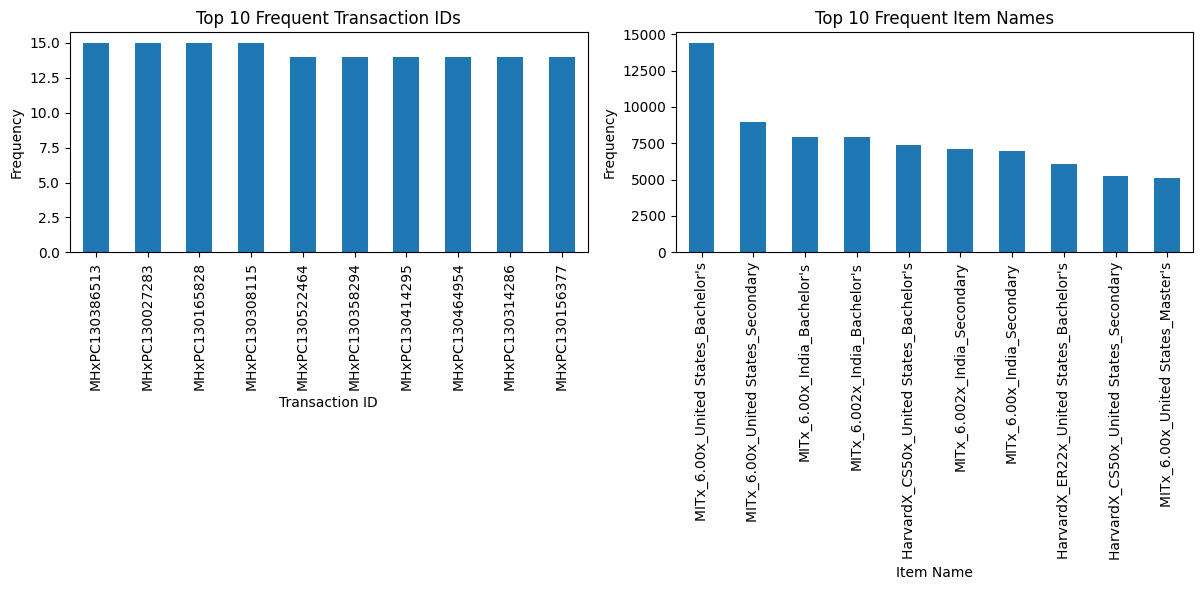

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
association['Transaction ID'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Frequent Transaction IDs')
plt.xlabel('Transaction ID')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
association['Item_Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Frequent Item Names')
plt.xlabel('Item Name')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


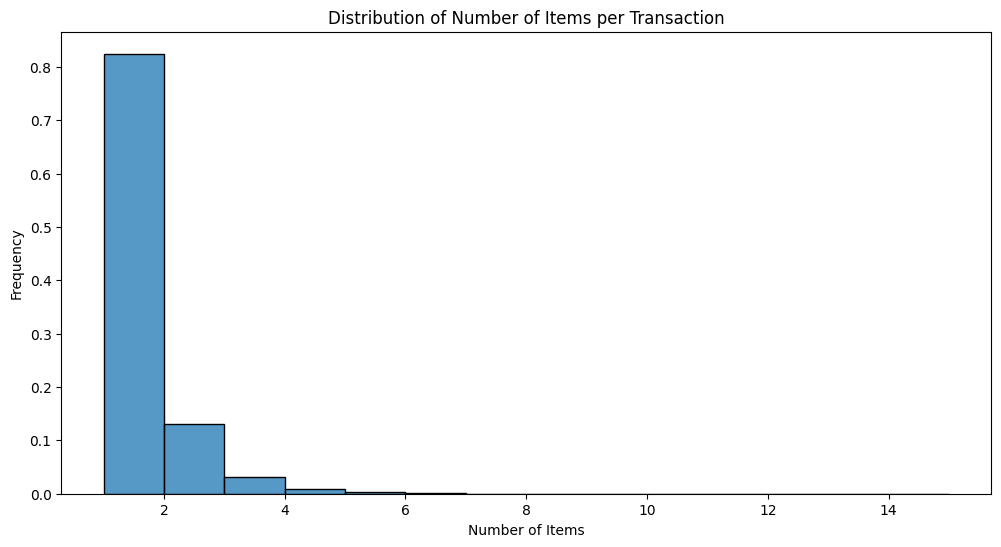

In [ ]:
transaction_counts = association['Transaction ID'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(transaction_counts, binwidth=1, stat='probability')
plt.title('Distribution of Number of Items per Transaction')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


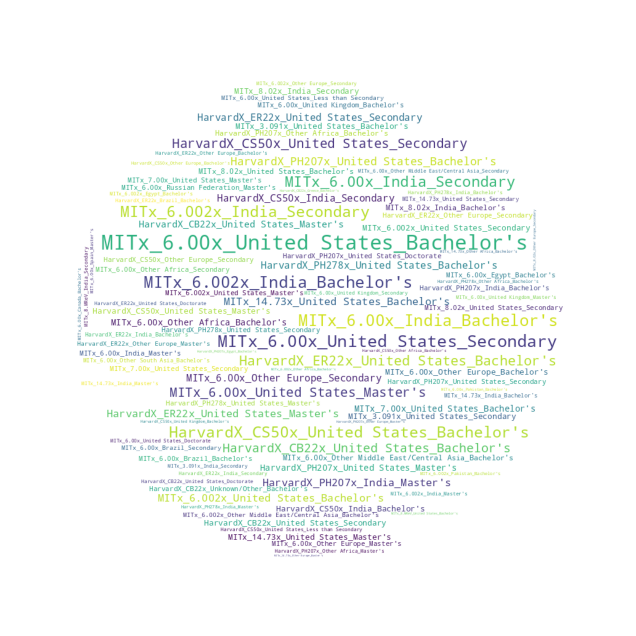

In [ ]:
items = association['Item_Name']
item_count = Counter(items)

x, y = np.ogrid[:1000, :1000]
mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(
    width = 1000,
    height = 500,
    mask = mask,
    background_color = 'white'
).generate_from_frequencies(item_count)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


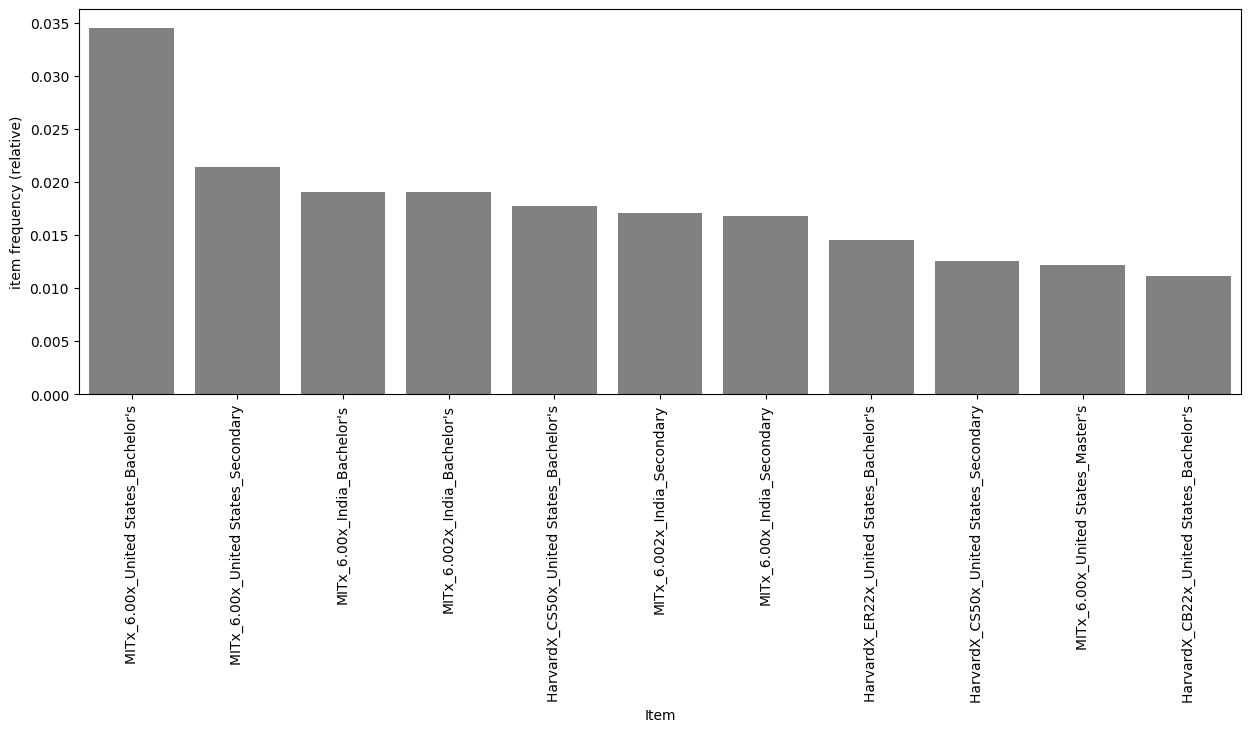

In [ ]:
# Item frequency (relative)
freq_df = pd.DataFrame({
    'item' : item_count.keys(),
    'freq' : item_count.values()
})

freq_df['ratio'] = freq_df['freq'] / len(association)
freq_df.sort_values('ratio', ascending=False, inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(
    x = 'item',
    y = 'ratio',
    color = 'gray',
    data = freq_df.query('ratio >= 0.01')
)
plt.xlabel("Item")
plt.ylabel("item frequency (relative)")
plt.xticks(rotation=90)
plt.show()

## Q3

In [ ]:
asso = association.sample(n=30000, random_state=42)
asso = asso.iloc[:, 1]
asso = pd.DataFrame(asso)

asso

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item_Name
378271,MITx_6.00x_China_Bachelor's
302059,MITx_6.00x_Spain_Master's
286292,MITx_7.00x_United States_Bachelor's
136420,HarvardX_PH278x_Other South America_Bachelor's
350944,MITx_14.73x_Other Africa_Bachelor's
...,...
128230,HarvardX_CB22x_United States_Master's
210112,MITx_6.00x_United States_Master's
390631,MITx_7.00x_United States_Bachelor's
132340,HarvardX_CB22x_United States_Bachelor's


In [ ]:
# Rule generation by Apriori
item_list = []

for items in sum(asso.values.tolist(),[]):
    item_list.append(items.split('_'))

association_te = TransactionEncoder()
association_transactions = association_te.fit_transform(item_list)
association_transactions = pd.DataFrame(
    data = association_transactions, columns = association_te.columns_
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(item_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30000

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.01, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 40 combinations | Sampling itemset size 5


(574, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.05, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules.shape

Processing 28 combinations | Sampling itemset size 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(92, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.1, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 105 combinations | Sampling itemset size 3


(34, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.01, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 40 combinations | Sampling itemset size 5


(420, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.05, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
rules.shape

Processing 28 combinations | Sampling itemset size 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(76, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.1, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
rules.shape

Processing 105 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(31, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.01, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 40 combinations | Sampling itemset size 5


(299, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.05, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
rules.shape

Processing 28 combinations | Sampling itemset size 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(51, 10)

In [ ]:
frequent_itemsets = apriori(association_transactions, min_support=0.1, use_colnames=True, verbose=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
rules.shape

Processing 105 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(24, 10)

In [ ]:
frequent_itemsets = apriori(
    association_transactions, min_support=0.001, use_colnames=True, verbose=True
)
# Association Rule Generation
rules = association_rules(
    frequent_itemsets, metric='confidence', min_threshold=0.05
)
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 10725 combinations | Sampling itemset size 5


(4235, 10)

In [ ]:
rules.sort_values('support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
189,(Bachelor's),(MITx),0.437333,0.578800,0.257500,0.588796,1.017270,0.004371,1.024308,0.030172
190,(MITx),(Bachelor's),0.578800,0.437333,0.257500,0.444886,1.017270,0.004371,1.013606,0.040305
91,(MITx),(6.00x),0.578800,0.248567,0.248567,0.429452,1.727713,0.104696,1.317037,1.000000
92,(6.00x),(MITx),0.248567,0.578800,0.248567,1.000000,1.727713,0.104696,inf,0.560529
418,(MITx),(Secondary),0.578800,0.301733,0.193200,0.333794,1.106255,0.018557,1.048124,0.228038
...,...,...,...,...,...,...,...,...,...,...
1245,"(Germany, 8.02x)",(MITx),0.001000,0.578800,0.001000,1.000000,1.727713,0.000421,inf,0.421622
2178,"(PH278x, Less than Secondary)",(HarvardX),0.001000,0.421200,0.001000,1.000000,2.374169,0.000579,inf,0.579379
2177,"(HarvardX, Less than Secondary)",(PH278x),0.010200,0.058900,0.001000,0.098039,1.664503,0.000399,1.043393,0.403334
2880,(Russian Federation),"(6.002x, Secondary, MITx)",0.018000,0.041667,0.001000,0.055556,1.333333,0.000250,1.014706,0.254582


In [ ]:
rules.sort_values('confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1014,"(Morocco, 6.00x)",(MITx),0.003733,0.578800,0.003733,1.000000,1.727713,0.001572,inf,0.422778
3973,"(CS50x, Secondary, Other Europe)",(HarvardX),0.004033,0.421200,0.004033,1.000000,2.374169,0.002334,inf,0.581144
3582,"(Bachelor's, CS50x, Other Africa)",(HarvardX),0.002467,0.421200,0.002467,1.000000,2.374169,0.001428,inf,0.580231
615,"(Secondary, 2.01x)",(MITx),0.003867,0.578800,0.003867,1.000000,1.727713,0.001629,inf,0.422835
1888,"(CS50x, Other South Asia)",(HarvardX),0.002567,0.421200,0.002567,1.000000,2.374169,0.001486,inf,0.580289
...,...,...,...,...,...,...,...,...,...,...
2889,(6.002x),"(Secondary, United States, MITx)",0.115133,0.046900,0.005767,0.050087,1.067950,0.000367,1.003355,0.071905
2887,"(6.002x, MITx)","(Secondary, United States)",0.115133,0.083633,0.005767,0.050087,0.598886,-0.003862,0.964685,-0.430819
849,(6.002x),"(Secondary, United States)",0.115133,0.083633,0.005767,0.050087,0.598886,-0.003862,0.964685,-0.430819
3389,"(Bachelor's, Other Europe)","(8.02x, MITx)",0.020633,0.051900,0.001033,0.050081,0.964948,-0.000038,0.998085,-0.035765


In [ ]:
rules.sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3551,"(Bachelor's, CB22x)","(Unknown/Other, HarvardX)",0.029800,0.009333,0.003567,0.119687,12.823586,0.003289,1.125357,0.950339
3555,"(Unknown/Other, HarvardX)","(Bachelor's, CB22x)",0.009333,0.029800,0.003567,0.382143,12.823586,0.003289,1.570266,0.930705
3904,"(Unknown/Other, HarvardX, Secondary)",(CB22x),0.002100,0.067933,0.001800,0.857143,12.617412,0.001657,6.524467,0.922682
3878,"(Unknown/Other, HarvardX, Master's)",(CB22x),0.002300,0.067933,0.001867,0.811594,11.946922,0.001710,4.947123,0.918409
1803,(CB22x),"(Unknown/Other, HarvardX)",0.067933,0.009333,0.007500,0.110402,11.828824,0.006866,1.113612,0.982184
...,...,...,...,...,...,...,...,...,...,...
3509,"(Bachelor's, CB22x, HarvardX)",(India),0.029800,0.167267,0.001600,0.053691,0.320992,-0.003385,0.879981,-0.685566
2804,"(6.002x, India, MITx)",(Master's),0.039133,0.213267,0.002433,0.062181,0.291563,-0.005913,0.838896,-0.716614
750,"(6.002x, India)",(Master's),0.039133,0.213267,0.002433,0.062181,0.291563,-0.005913,0.838896,-0.716614
2384,"(PH207x, India)",(Secondary),0.014800,0.301733,0.001000,0.067568,0.223931,-0.003466,0.748866,-0.778649


In [ ]:
rules['performance'] = rules['support'] * rules['confidence'] * rules['lift']
rules.sort_values('performance', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,performance
92,(6.00x),(MITx),0.248567,0.578800,0.248567,1.000000,1.727713,0.104696,inf,0.560529,0.429452
255,(CS50x),(HarvardX),0.109300,0.421200,0.109300,1.000000,2.374169,0.063263,inf,0.649826,0.259497
310,(ER22x),(HarvardX),0.097433,0.421200,0.097433,1.000000,2.374169,0.056394,inf,0.641282,0.231323
366,(PH207x),(HarvardX),0.087633,0.421200,0.087633,1.000000,2.374169,0.050722,inf,0.634394,0.208056
52,(6.002x),(MITx),0.115133,0.578800,0.115133,1.000000,1.727713,0.048494,inf,0.476004,0.198917
...,...,...,...,...,...,...,...,...,...,...,...
3509,"(Bachelor's, CB22x, HarvardX)",(India),0.029800,0.167267,0.001600,0.053691,0.320992,-0.003385,0.879981,-0.685566,0.000028
1392,"(Bachelor's, CB22x)",(India),0.029800,0.167267,0.001600,0.053691,0.320992,-0.003385,0.879981,-0.685566,0.000028
1965,(Canada),"(Master's, MITx)",0.020700,0.104867,0.001067,0.051530,0.491384,-0.001104,0.943765,-0.513843,0.000027
4132,"(HarvardX, PH207x, India)",(Secondary),0.014800,0.301733,0.001000,0.067568,0.223931,-0.003466,0.748866,-0.778649,0.000015


## Extra Question

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


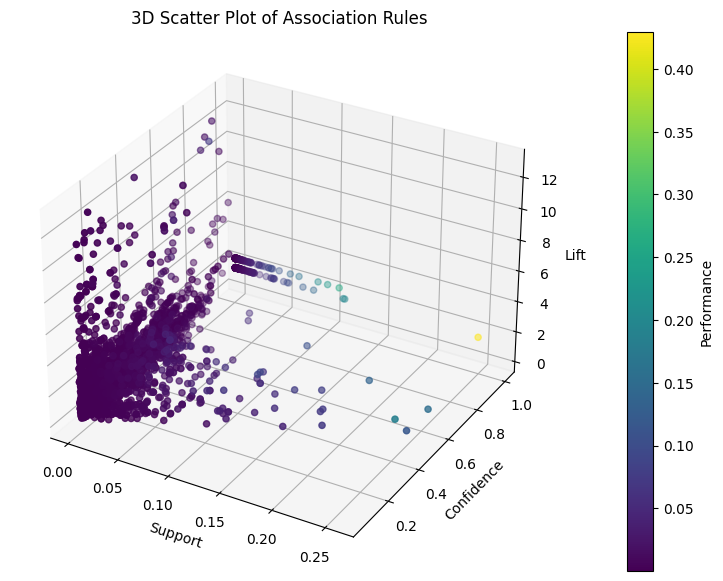

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(rules['support'], rules['confidence'], rules['lift'], c=rules['performance'], cmap='viridis', marker='o')

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
ax.set_title('3D Scatter Plot of Association Rules')

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Performance')

plt.show()

# Part 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

import scipy.stats as stats
from scipy.spatial import ConvexHull

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Q1

In [ ]:
import pandas as pd

customer = pd.read_csv('CC GENERAL.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
customer = customer.dropna()
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

## K-Means Clustering

### Q2

In [ ]:
import time
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
customer = customer.drop(['CUST_ID'], axis=1)
customer_scaled = scaler.fit_transform(customer)

In [ ]:
def dunn_index(data, labels):
    unique_labels = np.unique(labels)
    clusters = [data[labels == label] for label in unique_labels]

    intra_dists = [np.max(pdist(cluster)) for cluster in clusters]
    max_intra_dist = np.max(intra_dists)

    inter_dists = []
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = np.min(cdist(clusters[i], clusters[j]))
            inter_dists.append(dist)
    min_inter_dist = np.min(inter_dists)

    dunn = min_inter_dist / max_intra_dist
    return dunn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

start_time = time.time()

dunn_indices = []
silhouette_scores = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(customer_scaled)
    labels = kmeans.labels_

    silhouette_avg = silhouette_score(customer_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    dunn = dunn_index(customer_scaled, labels)
    dunn_indices.append(dunn)

    print(f"Clusters: {i}, Silhouette Score: {silhouette_avg}, Dunn Index: {dunn}")

end_time = time.time()

print(f"Total computation time: {end_time - start_time} seconds")

Clusters: 2, Silhouette Score: 0.20892328220228673, Dunn Index: 0.006108152604600334
Clusters: 3, Silhouette Score: 0.24754638153191033, Dunn Index: 0.0038331076255042093
Clusters: 4, Silhouette Score: 0.19703675772374923, Dunn Index: 0.005493746388396378
Clusters: 5, Silhouette Score: 0.19223317739937715, Dunn Index: 0.005351742352507408
Clusters: 6, Silhouette Score: 0.2072425705719404, Dunn Index: 0.0036708378639907944
Clusters: 7, Silhouette Score: 0.219694021309588, Dunn Index: 0.0037689339255379743
Clusters: 8, Silhouette Score: 0.2273670636332744, Dunn Index: 0.006366641861911749
Clusters: 9, Silhouette Score: 0.23154306508064237, Dunn Index: 0.007829713024410762
Clusters: 10, Silhouette Score: 0.22505725875570437, Dunn Index: 0.007780072766017558
Clusters: 11, Silhouette Score: 0.22143826685323337, Dunn Index: 0.004902237575505663
Clusters: 12, Silhouette Score: 0.21734016504333378, Dunn Index: 0.004902237575505663
Clusters: 13, Silhouette Score: 0.22291261721019756, Dunn Index

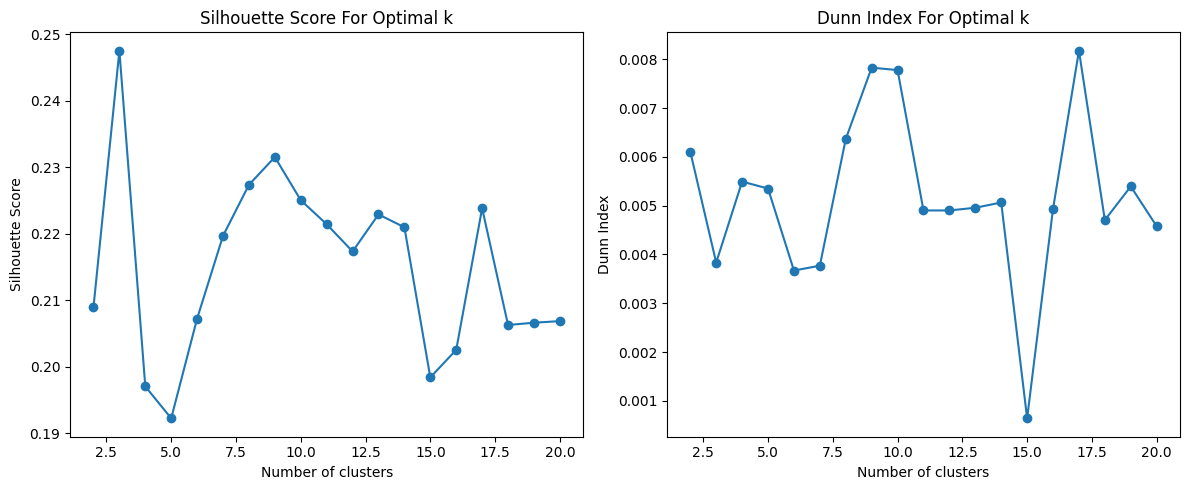

In [ ]:
x = range(2, 21, 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(x, dunn_indices, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index For Optimal k')

plt.tight_layout()
plt.show()

### Q3

In [ ]:
random_states = [i for i in range(10)]
results = []

for random_state in random_states:
    cus_kmc = KMeans(n_clusters=3, random_state=random_state).fit(customer_scaled)
    results.append(cus_kmc.labels_)

    print('Cluster centers')
    print(cus_kmc.cluster_centers_)
    print('Cluster size')
    print(np.unique(cus_kmc.labels_, return_counts=True))

Cluster centers
[[-0.36980098 -0.17044319 -0.23352488 -0.20457684 -0.17604836 -0.31199758
  -0.05958495 -0.23363208 -0.04813876 -0.33599084 -0.30117379 -0.24510819
  -0.34298554 -0.28765999 -0.13965419  0.01561121 -0.02519338]
 [ 0.30332304  0.41987159  1.51168289  1.26371701  1.25122055 -0.24909419
   1.13337888  1.53916362  0.95735143 -0.36449691 -0.25460127  1.66768723
   0.88894685  0.82440776  0.15794244  0.47229807  0.29533849]
 [ 1.15191885  0.31393058 -0.29540954 -0.2118566  -0.30916994  1.36313684
  -0.65466082 -0.31629935 -0.56120484  1.5425362   1.32680929 -0.37283751
   0.59761138  0.44011841  0.40139768 -0.42448233 -0.13433865]]
Cluster size
(array([0, 1, 2], dtype=int32), array([5863, 1211, 1562]))
Cluster centers
[[-0.370055   -0.17067386 -0.23348193 -0.204549   -0.17599786 -0.31223498
  -0.05950236 -0.23357239 -0.04805332 -0.33643658 -0.30133515 -0.24504907
  -0.34314718 -0.28774111 -0.13967844  0.01580006 -0.0253232 ]
 [ 0.30332304  0.41987159  1.51168289  1.26371701  

### Q4

In [ ]:
most_common_result = Counter(map(tuple, results)).most_common(1)[0][0]
most_common_result = np.array(most_common_result)

customer_data = pd.concat([
    pd.DataFrame(customer_scaled, columns=customer.columns),
    pd.DataFrame(most_common_result, columns=['clusterID'])
], axis=1)

kmc_summary = customer_data.groupby('clusterID').mean()
kmc_summary = kmc_summary.transpose()
kmc_summary

clusterID,0,1,2
BALANCE,-0.366003,0.298697,1.155502
BALANCE_FREQUENCY,-0.169929,0.420214,0.313842
PURCHASES,-0.235080,1.502889,-0.294606
ONEOFF_PURCHASES,-0.206072,1.257483,-0.210840
INSTALLMENTS_PURCHASES,-0.176978,1.241887,-0.309137
CASH_ADVANCE,-0.310455,-0.250593,1.378664
PURCHASES_FREQUENCY,-0.063122,1.131832,-0.655038
ONEOFF_PURCHASES_FREQUENCY,-0.237023,1.537543,-0.314625
PURCHASES_INSTALLMENTS_FREQUENCY,-0.049984,0.951181,-0.562133
CASH_ADVANCE_FREQUENCY,-0.333496,-0.366759,1.558141


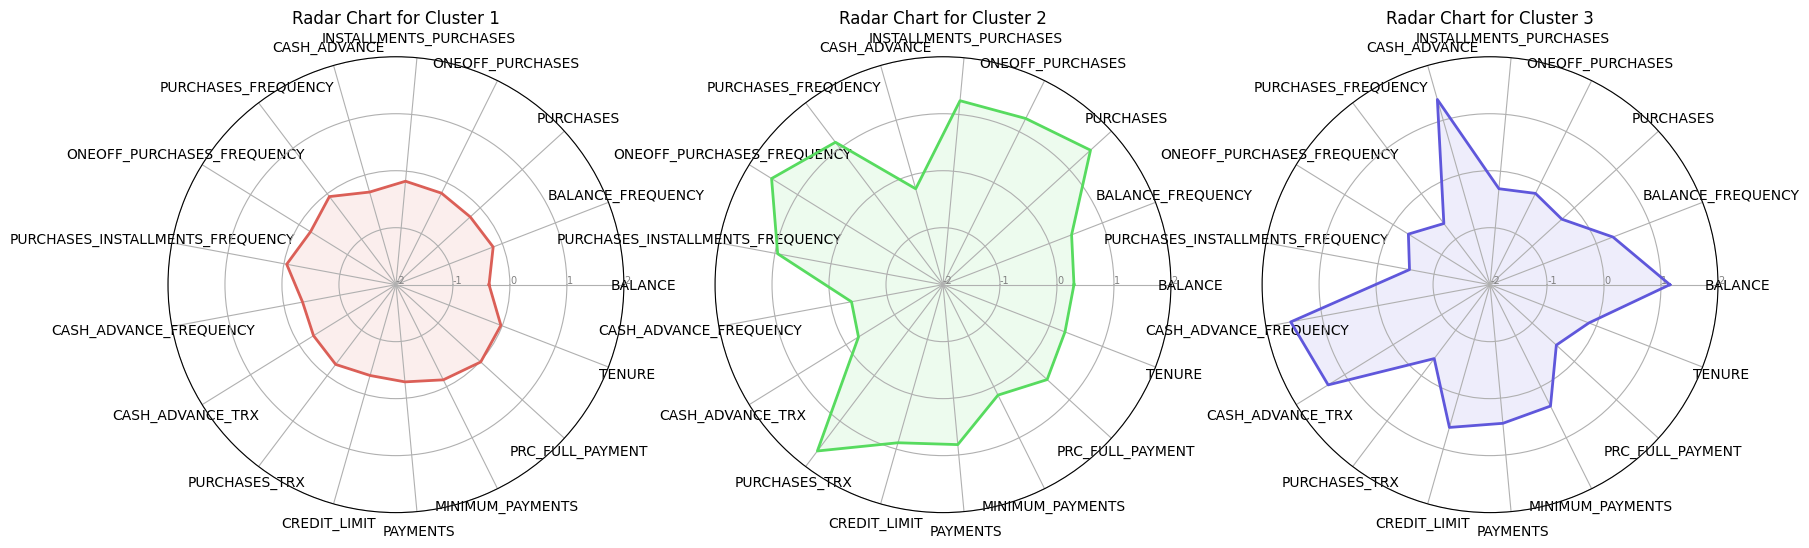

In [ ]:
# Radar Chart
categories = kmc_summary.index.tolist()
N = len(categories)

# Divide the plot / number of variable
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(1,3, figsize=(20,10), subplot_kw=dict(projection="polar"))

# Plot each individual = each line of the data
colors = sns.color_palette("hls", 3)

for i in range(kmc_summary.shape[1]):
    values = kmc_summary.iloc[:, i].values.flatten().tolist()
    values += values[:1]
    ax[i].plot(angles, values, linewidth=2, linestyle='solid', label="Cluster " + str(i + 1), color=colors[i])
    ax[i].fill(angles, values, color=colors[i], alpha=0.1)

    # Draw one axe per variable + add labels yet
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(categories, color='black', size=10)

    # Draw ylabels
    ax[i].set_rlabel_position(0)
    ax[i].set_yticks([-2, -1, 0, 1, 2])
    ax[i].set_yticklabels(["-2", "-1", "0", "1", "2"], color="grey", size=7)

    # Set title
    ax[i].set_title(f'Radar Chart for Cluster {i + 1}')

plt.show()

### Q5

In [ ]:
# Compare the cluster 2 & 3
cu_cluster2 = customer_data[customer_data['clusterID'] == 1].iloc[:, :-2]
cu_cluster3 = customer_data[customer_data['clusterID'] == 2].iloc[:, :-2]

# t_test_result
cu_t_result = pd.DataFrame(columns=['two_sided', 'greater', 'less'])

for i in range(cu_cluster2.shape[1]):
    two_sided = stats.ttest_ind(cu_cluster2.iloc[:, i], cu_cluster3.iloc[:, i], equal_var=False)[1]
    greater = stats.ttest_ind(cu_cluster2.iloc[:, i], cu_cluster3.iloc[:, i], equal_var=False, alternative='greater')[1]
    less = stats.ttest_ind(cu_cluster2.iloc[:, i], cu_cluster3.iloc[:, i], equal_var=False, alternative='less')[1]

    cu_t_result.loc[i] = [two_sided, greater, less]

cu_t_result.index = cu_cluster2.columns.tolist()
cu_t_result

,two_sided,greater,less
BALANCE,3.366336e-67,1.000000e+00,1.683168e-67
BALANCE_FREQUENCY,1.184000e-10,5.920001e-11,1.000000e+00
PURCHASES,1.563931e-160,7.819657e-161,1.000000e+00
ONEOFF_PURCHASES,1.653874e-101,8.269371e-102,1.000000e+00
INSTALLMENTS_PURCHASES,1.080838e-121,5.404192e-122,1.000000e+00
CASH_ADVANCE,3.928341e-225,1.000000e+00,1.964170e-225
PURCHASES_FREQUENCY,0.000000e+00,0.000000e+00,1.000000e+00
ONEOFF_PURCHASES_FREQUENCY,0.000000e+00,0.000000e+00,1.000000e+00
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000e+00,0.000000e+00,1.000000e+00
CASH_ADVANCE_FREQUENCY,0.000000e+00,1.000000e+00,0.000000e+00


In [ ]:
# Compare the cluster 1 & 2
cu_cluster1 = customer_data[customer_data['clusterID'] == 0].iloc[:, :-2]
cu_cluster2 = customer_data[customer_data['clusterID'] == 1].iloc[:, :-2]

# t_test_result
cu_t_result2 = pd.DataFrame(columns=['two_sided', 'greater', 'less'])

for i in range(cu_cluster1.shape[1]):
    two_sided = stats.ttest_ind(cu_cluster1.iloc[:, i], cu_cluster2.iloc[:, i], equal_var=False)[1]
    greater = stats.ttest_ind(cu_cluster1.iloc[:, i], cu_cluster2.iloc[:, i], equal_var=False, alternative='greater')[1]
    less = stats.ttest_ind(cu_cluster1.iloc[:, i], cu_cluster2.iloc[:, i], equal_var=False, alternative='less')[1]

    cu_t_result2.loc[i] = [two_sided, greater, less]

cu_t_result2.index = cu_cluster1.columns.tolist()
cu_t_result2

,two_sided,greater,less
BALANCE,1.489650e-68,1.000000,7.448252e-69
BALANCE_FREQUENCY,9.903335e-227,1.000000,4.951668e-227
PURCHASES,1.885101e-153,1.000000,9.425504e-154
ONEOFF_PURCHASES,8.894561e-102,1.000000,4.447280e-102
INSTALLMENTS_PURCHASES,2.793691e-106,1.000000,1.396846e-106
CASH_ADVANCE,1.198994e-03,0.999401,5.994971e-04
PURCHASES_FREQUENCY,0.000000e+00,1.000000,0.000000e+00
ONEOFF_PURCHASES_FREQUENCY,0.000000e+00,1.000000,0.000000e+00
PURCHASES_INSTALLMENTS_FREQUENCY,9.244470e-237,1.000000,4.622235e-237
CASH_ADVANCE_FREQUENCY,1.025852e-01,0.051293,9.487074e-01


## Hierarchical Clustering

### Q6

In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform, pdist, cdist
from sklearn.metrics import silhouette_score
from scipy import stats
import matplotlib.pyplot as plt

cor_Mat = stats.spearmanr(customer_scaled.T).correlation.astype(np.float32)
dist_customer = 1 - cor_Mat

hr = linkage(squareform(dist_customer), method='complete')

dunn_indices = []
silhouette_scores = []

for n_clusters in range(2, 21, 1):
    labels = fcluster(hr, n_clusters, criterion='maxclust')

    silhouette_avg = silhouette_score(customer_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    dunn = dunn_index(customer_scaled, labels)
    dunn_indices.append(dunn)

    print(f"Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}, Dunn Index: {dunn}")

Clusters: 2, Silhouette Score: 0.1370067339309725, Dunn Index: 0.0027659755788812974
Clusters: 3, Silhouette Score: 0.0414484731206619, Dunn Index: 0.0027659755788812974
Clusters: 4, Silhouette Score: 0.06440143993283122, Dunn Index: 0.0027659755788812974
Clusters: 5, Silhouette Score: 0.027546948292857518, Dunn Index: 0.0027659755788812974
Clusters: 6, Silhouette Score: 0.05442939331464243, Dunn Index: 0.0027659755788812974
Clusters: 7, Silhouette Score: 0.014974870314058485, Dunn Index: 0.0027659755788812974
Clusters: 8, Silhouette Score: 0.021291441521108234, Dunn Index: 0.0027659755788812974
Clusters: 9, Silhouette Score: 0.02576397430391098, Dunn Index: 0.0027659755788812974
Clusters: 10, Silhouette Score: 0.025234384277310347, Dunn Index: 0.0011626704289013072
Clusters: 11, Silhouette Score: 0.02620960983996793, Dunn Index: 0.0011626704289013072
Clusters: 12, Silhouette Score: 0.009801450604816794, Dunn Index: 0.0011626704289013072
Clusters: 13, Silhouette Score: -0.0042562495943

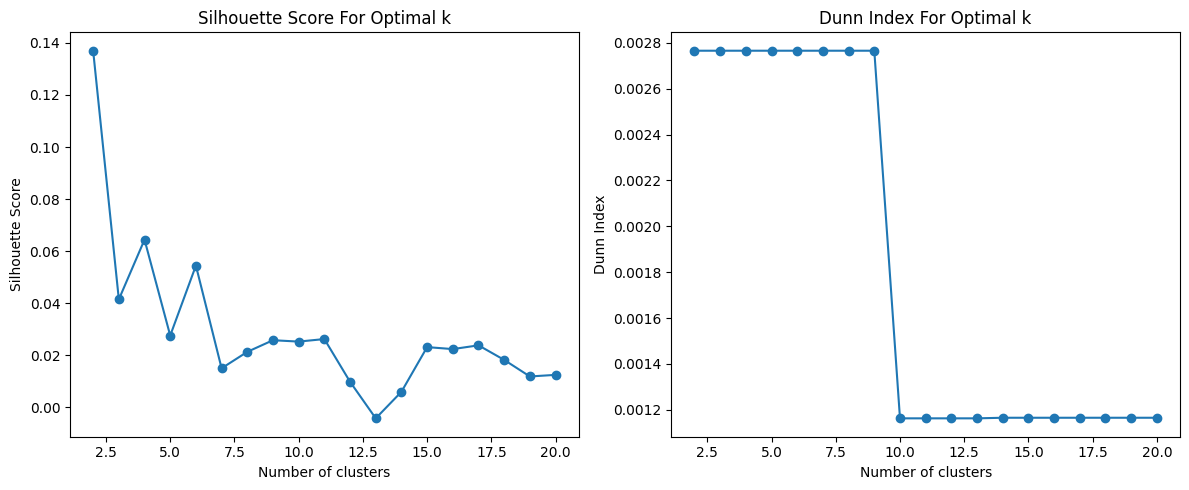

In [ ]:
x = range(2, 21, 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(x, dunn_indices, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index For Optimal k')

plt.tight_layout()
plt.show()

In [ ]:
def dunn_index(data, labels):
    unique_labels = np.unique(labels)
    clusters = [data[labels == label] for label in unique_labels]

    intra_dists = []
    for cluster in clusters:
        if len(cluster) > 1:
            intra_dists.append(np.max(pdist(cluster)))
    if len(intra_dists) == 0:
        return np.nan

    max_intra_dist = np.max(intra_dists)

    inter_dists = []
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            if len(clusters[i]) > 0 and len(clusters[j]) > 0:
                dist = np.min(cdist(clusters[i], clusters[j]))
                inter_dists.append(dist)
    if len(inter_dists) == 0:
        return np.nan

    min_inter_dist = np.min(inter_dists)

    dunn = min_inter_dist / max_intra_dist
    return dunn

In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform, pdist, cdist
from sklearn.metrics import silhouette_score
from scipy import stats
import matplotlib.pyplot as plt

cor_Mat = stats.spearmanr(customer_scaled.T).correlation.astype(np.float32)
dist_customer = 1 - cor_Mat

hr = linkage(squareform(dist_customer), method='single')

dunn_indices = []
silhouette_scores = []

for n_clusters in range(2, 21, 1):
    labels = fcluster(hr, n_clusters, criterion='maxclust')

    silhouette_avg = silhouette_score(customer_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    dunn = dunn_index(customer_scaled, labels)
    dunn_indices.append(dunn)

    print(f"Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}, Dunn Index: {dunn}")

Clusters: 2, Silhouette Score: -0.25828468787950676, Dunn Index: 0.0271745010174048
Clusters: 3, Silhouette Score: -0.25828468787950676, Dunn Index: 0.0271745010174048
Clusters: 4, Silhouette Score: -0.30067420256808536, Dunn Index: 0.0271745010174048
Clusters: 5, Silhouette Score: -0.31565597389334815, Dunn Index: 0.0271745010174048
Clusters: 6, Silhouette Score: -0.31671688400882875, Dunn Index: 0.0271745010174048
Clusters: 7, Silhouette Score: -0.35665161988968036, Dunn Index: 0.022668541205571435
Clusters: 8, Silhouette Score: -0.35665161988968036, Dunn Index: 0.022668541205571435
Clusters: 9, Silhouette Score: -0.35921596455980775, Dunn Index: 0.022668541205571435
Clusters: 10, Silhouette Score: -0.36317445729897496, Dunn Index: 0.022668541205571435
Clusters: 11, Silhouette Score: -0.3664724407481991, Dunn Index: 0.022668541205571435
Clusters: 12, Silhouette Score: -0.3765265817617182, Dunn Index: 0.022668541205571435
Clusters: 13, Silhouette Score: -0.3765265817617182, Dunn Index

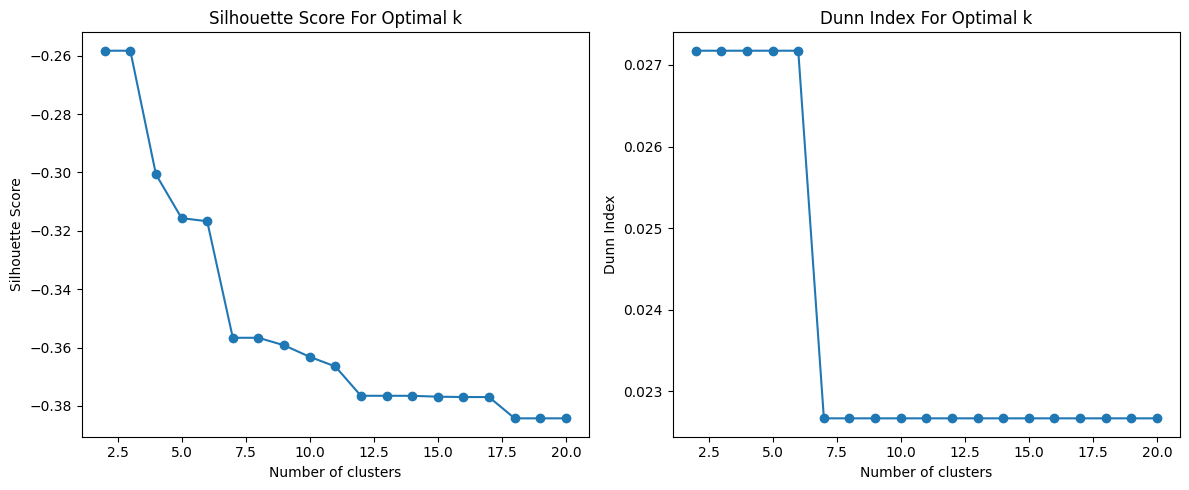

In [ ]:
x = range(2, 21, 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(x, dunn_indices, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index For Optimal k')

plt.tight_layout()
plt.show()

### Q7

In [ ]:
hr = linkage(squareform(dist_customer), method='complete')

random_states = [i for i in range(10)]
results = []

for random_state in random_states:
    labels = fcluster(hr, 2, criterion='maxclust')
    results.append(labels)

In [ ]:
most_common_result = Counter(map(tuple, results)).most_common(1)[0][0]
most_common_result = np.array(most_common_result)

customer_data = pd.concat([
    pd.DataFrame(customer_scaled, columns=customer.columns),
    pd.DataFrame(most_common_result, columns=['clusterID'])
], axis=1)

hr_summary = customer_data.groupby('clusterID').mean()
hr_summary = hr_summary.transpose()
hr_summary

clusterID,1,2
BALANCE,-0.350190,0.254779
BALANCE_FREQUENCY,-0.237810,0.173018
PURCHASES,0.287959,-0.209503
ONEOFF_PURCHASES,0.155022,-0.112785
INSTALLMENTS_PURCHASES,0.395873,-0.288016
CASH_ADVANCE,-0.430232,0.313013
PURCHASES_FREQUENCY,0.625454,-0.455046
ONEOFF_PURCHASES_FREQUENCY,0.098742,-0.071839
PURCHASES_INSTALLMENTS_FREQUENCY,0.719952,-0.523798
CASH_ADVANCE_FREQUENCY,-0.617263,0.449087


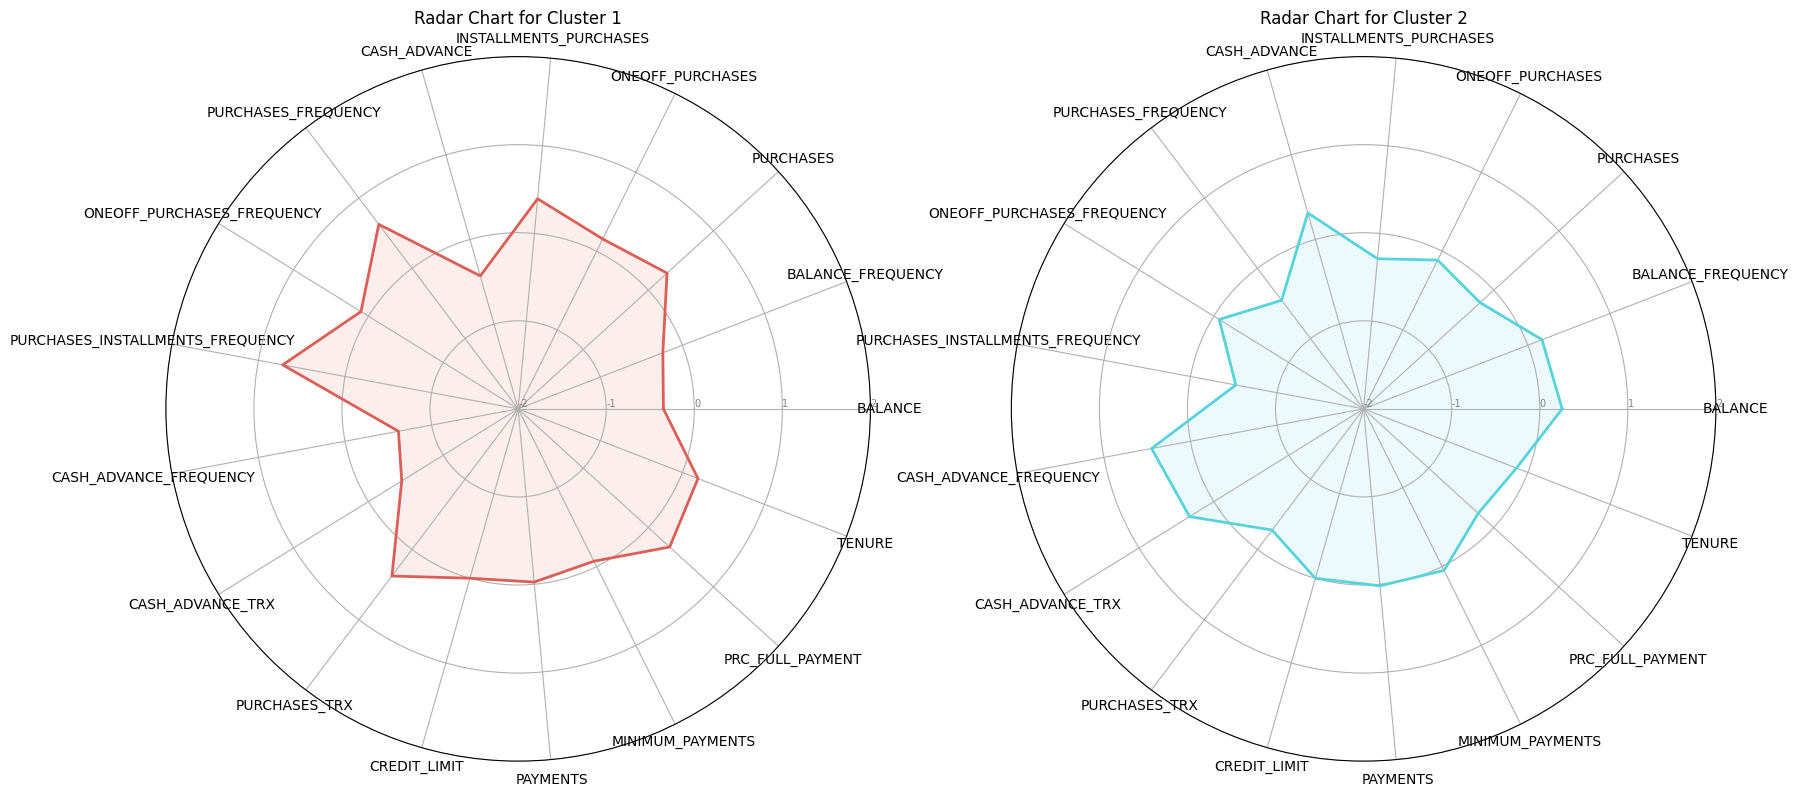

In [ ]:
# Radar Chart
categories = hr_summary.index.tolist()
N = len(categories)

# Divide the plot / number of variable
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(1,2, figsize=(20,10), subplot_kw=dict(projection="polar"))

# Plot each individual = each line of the data
colors = sns.color_palette("hls", 2)

for i in range(hr_summary.shape[1]):
    values = hr_summary.iloc[:, i].values.flatten().tolist()
    values += values[:1]
    ax[i].plot(angles, values, linewidth=2, linestyle='solid', label="Cluster " + str(i + 1), color=colors[i])
    ax[i].fill(angles, values, color=colors[i], alpha=0.1)

    # Draw one axe per variable + add labels yet
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(categories, color='black', size=10)

    # Draw ylabels
    ax[i].set_rlabel_position(0)
    ax[i].set_yticks([-2, -1, 0, 1, 2])
    ax[i].set_yticklabels(["-2", "-1", "0", "1", "2"], color="grey", size=7)

    # Set title
    ax[i].set_title(f'Radar Chart for Cluster {i + 1}')

plt.show()

In [ ]:
hr = linkage(squareform(dist_customer), method='single')

random_states = [i for i in range(10)]
results = []

for random_state in random_states:
    labels = fcluster(hr, 2, criterion='maxclust')
    results.append(labels)

In [ ]:
most_common_result = Counter(map(tuple, results)).most_common(1)[0][0]
most_common_result = np.array(most_common_result)

customer_data = pd.concat([
    pd.DataFrame(customer_scaled, columns=customer.columns),
    pd.DataFrame(most_common_result, columns=['clusterID'])
], axis=1)

hr_summary = customer_data.groupby('clusterID').mean()
hr_summary = hr_summary.transpose()
hr_summary

clusterID,1,2
BALANCE,-5.762348e-05,0.497579
BALANCE_FREQUENCY,4.285429e-05,-0.370047
PURCHASES,1.213634e-05,-0.104797
ONEOFF_PURCHASES,2.254679e-05,-0.194692
INSTALLMENTS_PURCHASES,-1.268902e-05,0.109570
CASH_ADVANCE,-1.207919e-04,1.043038
PURCHASES_FREQUENCY,-1.154472e-06,0.009969
ONEOFF_PURCHASES_FREQUENCY,-1.701831e-05,0.146953
PURCHASES_INSTALLMENTS_FREQUENCY,-1.391970e-05,0.120197
CASH_ADVANCE_FREQUENCY,-1.668005e-05,0.144032


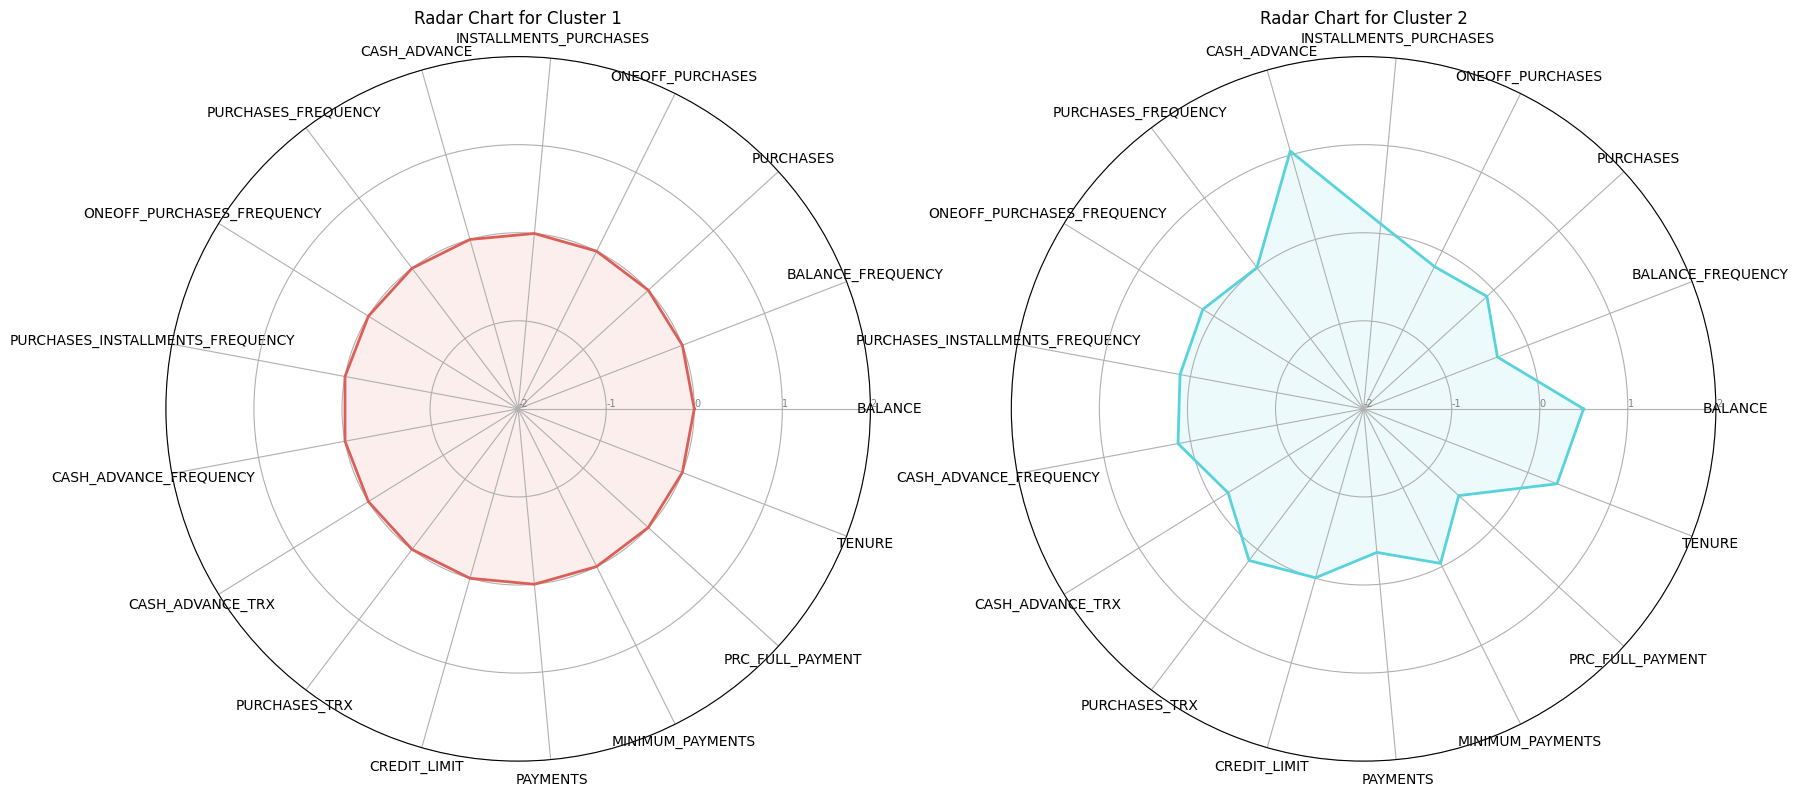

In [ ]:
# Radar Chart
categories = hr_summary.index.tolist()
N = len(categories)

# Divide the plot / number of variable
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(1,2, figsize=(20,10), subplot_kw=dict(projection="polar"))

# Plot each individual = each line of the data
colors = sns.color_palette("hls", 2)

for i in range(hr_summary.shape[1]):
    values = hr_summary.iloc[:, i].values.flatten().tolist()
    values += values[:1]
    ax[i].plot(angles, values, linewidth=2, linestyle='solid', label="Cluster " + str(i + 1), color=colors[i])
    ax[i].fill(angles, values, color=colors[i], alpha=0.1)

    # Draw one axe per variable + add labels yet
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(categories, color='black', size=10)

    # Draw ylabels
    ax[i].set_rlabel_position(0)
    ax[i].set_yticks([-2, -1, 0, 1, 2])
    ax[i].set_yticklabels(["-2", "-1", "0", "1", "2"], color="grey", size=7)

    # Set title
    ax[i].set_title(f'Radar Chart for Cluster {i + 1}')

plt.show()

## DBSCAN

### Q8 & Q9

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

eps_values = np.arange(0.1, 2.1, 0.1)
minPts_values = range(2, 11)

results = []

for eps in eps_values:
    for minPts in minPts_values:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        labels = dbscan.fit_predict(customer_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            silhouette_avg = silhouette_score(customer_scaled, labels) if n_clusters > 1 else -1
            results.append((eps, minPts, n_clusters, n_noise, silhouette_avg))

        print(f"eps: {eps}, minPts: {minPts}, Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: {silhouette_avg}")

results_df = pd.DataFrame(results, columns=['eps', 'minPts', 'n_clusters', 'n_noise', 'silhouette_score'])

optimal_result = results_df[results_df['n_clusters'] == 3].sort_values(by='silhouette_score', ascending=False).head(1)

optimal_eps = optimal_result['eps'].values[0]
optimal_minPts = optimal_result['minPts'].values[0]
optimal_n_noise = optimal_result['n_noise'].values[0]

print(f"Optimal eps: {optimal_eps}, Optimal minPts: {optimal_minPts}, Noise points: {optimal_n_noise}")

eps: 0.1, minPts: 2, Clusters: 97, Noise: 8274, Silhouette Score: -0.5069691256316601
eps: 0.1, minPts: 3, Clusters: 41, Noise: 8386, Silhouette Score: -0.4689633985711107
eps: 0.1, minPts: 4, Clusters: 22, Noise: 8453, Silhouette Score: -0.4195692899675594
eps: 0.1, minPts: 5, Clusters: 11, Noise: 8503, Silhouette Score: -0.3737304348974619
eps: 0.1, minPts: 6, Clusters: 5, Noise: 8543, Silhouette Score: -0.2750774407861322
eps: 0.1, minPts: 7, Clusters: 3, Noise: 8559, Silhouette Score: -0.25366918294691654
eps: 0.1, minPts: 8, Clusters: 2, Noise: 8569, Silhouette Score: -0.25090328181425725
eps: 0.1, minPts: 9, Clusters: 2, Noise: 8574, Silhouette Score: -0.25124562443919085
eps: 0.1, minPts: 10, Clusters: 2, Noise: 8574, Silhouette Score: -0.25124562443919085
eps: 0.2, minPts: 2, Clusters: 209, Noise: 7706, Silhouette Score: -0.5070129606682875
eps: 0.2, minPts: 3, Clusters: 72, Noise: 7980, Silhouette Score: -0.46706738803126086
eps: 0.2, minPts: 4, Clusters: 37, Noise: 8112, Silh

In [ ]:
optimal_result

,eps,minPts,n_clusters,n_noise,silhouette_score
120,1.4,6,3,1600,0.252571
